<a href="https://colab.research.google.com/github/Rogerio-mack/Temporal/blob/main/data_sources.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, imports and load your Kaggle key

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             
%matplotlib inline
import seaborn as sns

In [34]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 63 bytes


In [35]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
!ls /root/.kaggle/

kaggle.json


# **Pharma Sales**

Original Source: https://www.kaggle.com/datasets/milanzdravkovic/pharma-sales-data

Date: 03/09/2022

Description

> Dados de 2014-2019 sobre vendas de medicamentos classificados em 8 categorias. 

> Categorias: 

> * M01AB - Produtos anti-inflamatórios e antirreumáticos, não esteroides, derivados do ácido acético e substâncias relacionadas
* M01AE - Produtos anti-inflamatórios e antirreumáticos, não esteroides, derivados do ácido propiônico
* N02BA - Outros analgésicos e antipiréticos, Ácido salicílico e derivados
* N02BE/B - Outros analgésicos e antipiréticos, Pirazolonas e Anilidas
* N05B - ​​Drogas Psicoléticas, Drogas Ansiolíticas
* N05C - Psicolépticos, Hipnóticos e sedativos
* R03 - Medicamentos para doenças obstrutivas das vias aéreas
* R06 - Anti-histamínicos para uso sistêmico

---


In [37]:
!kaggle datasets download -d milanzdravkovic/pharma-sales-data

  0% 0.00/352k [00:00<?, ?B/s]
100% 352k/352k [00:00<00:00, 22.2MB/s]


In [38]:
!ls /content


'Annual CSV REVISED 2019-20 published Jun 2020.csv'
 Annual-CSV-REVISED-2019-20-published-Jun-2020-g3XA1.zip
 kaggle.json
 pharma-sales-data.zip
 sample_data


In [39]:
!unzip pharma-sales-data.zip
!ls /content

Archive:  pharma-sales-data.zip
  inflating: salesdaily.csv          
  inflating: saleshourly.csv         
  inflating: salesmonthly.csv        
  inflating: salesweekly.csv         
'Annual CSV REVISED 2019-20 published Jun 2020.csv'	   saleshourly.csv
 Annual-CSV-REVISED-2019-20-published-Jun-2020-g3XA1.zip   salesmonthly.csv
 kaggle.json						   salesweekly.csv
 pharma-sales-data.zip					   sample_data
 salesdaily.csv


In [40]:
df = pd.read_csv('/content/salesmonthly.csv')
df.index = pd.to_datetime(df.datum)
df = df.drop(columns=['datum'])
df.index.name = ''
display( df.head() )
print(df.shape)

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
,,,,,,,,
2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


(70, 8)


In [41]:
df.columns

Index(['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'], dtype='object')

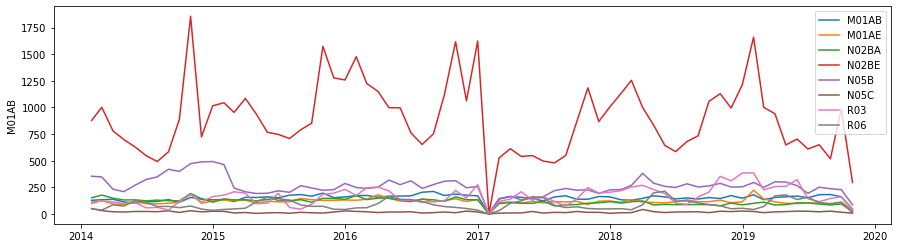

In [42]:
plt.figure(figsize=(15,4))

for s in df:
  sns.lineplot(x=df.index, y=s, data=df, label=s)

plt.legend()
plt.show()

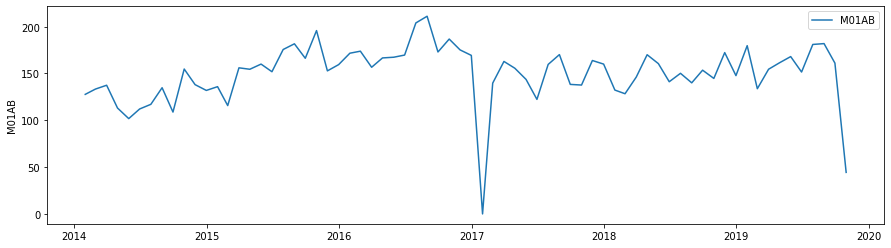

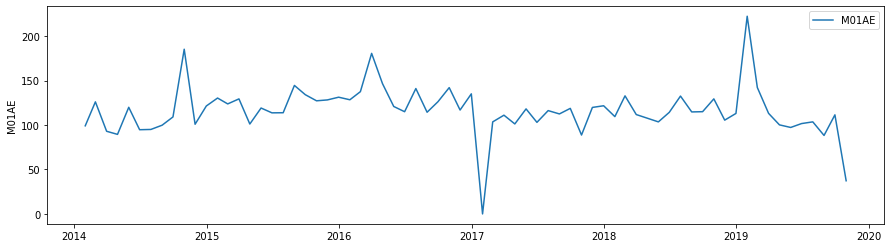

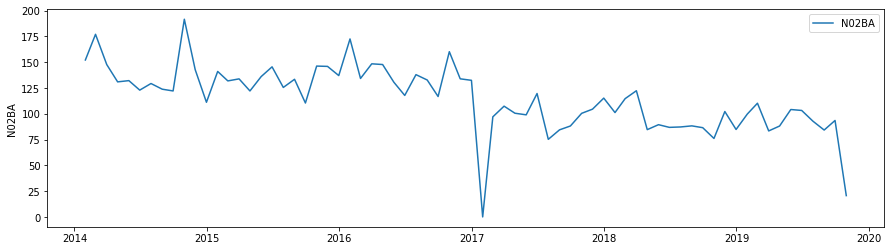

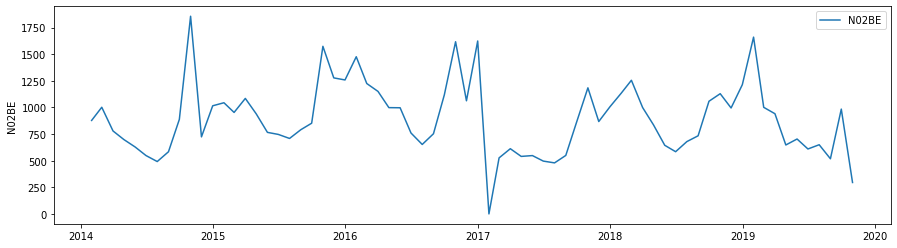

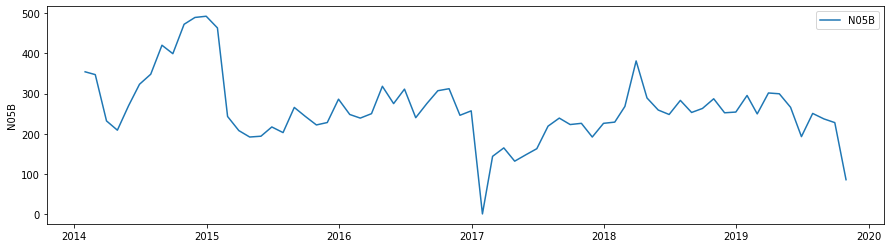

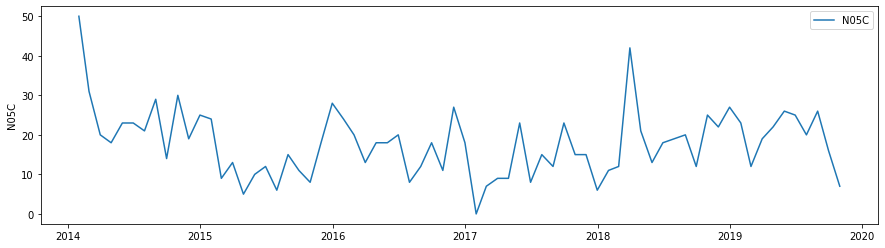

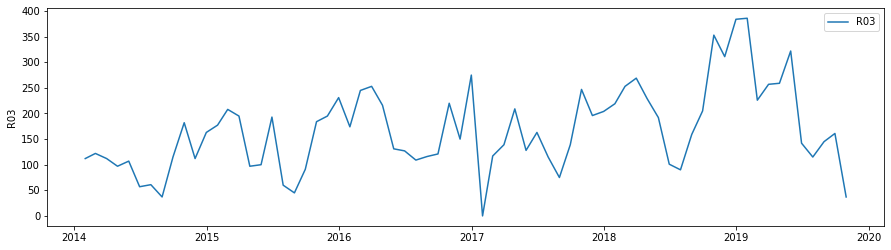

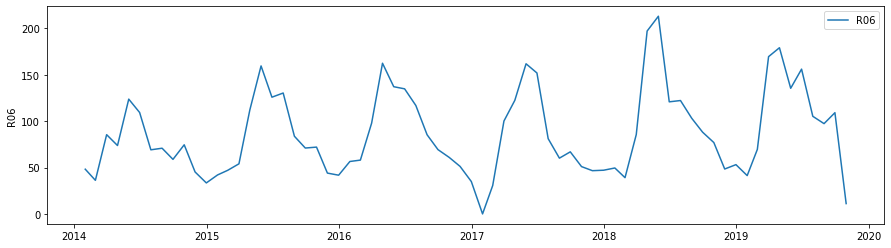

In [43]:
for s in df:
  plt.figure(figsize=(15,4))
  sns.lineplot(x=df.index, y=s, data=df, label=s)
  plt.legend()
  plt.show()

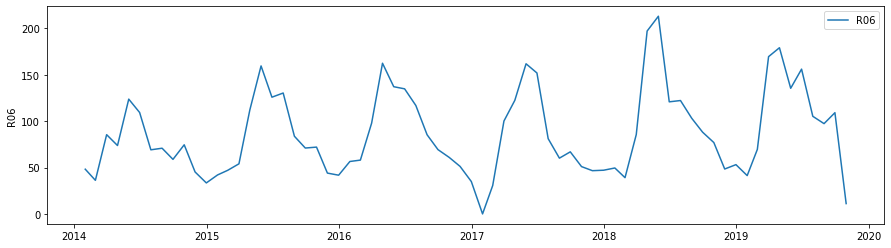

In [44]:
plt.figure(figsize=(15,4))

sns.lineplot(x=df.index, y='R06', data=df, label='R06')

plt.legend()
plt.show()

,index,variable,value
0,2014-01-31,M01AB,127.69
1,2014-02-28,M01AB,133.32
2,2014-03-31,M01AB,137.44
3,2014-04-30,M01AB,113.10
4,2014-05-31,M01AB,101.79


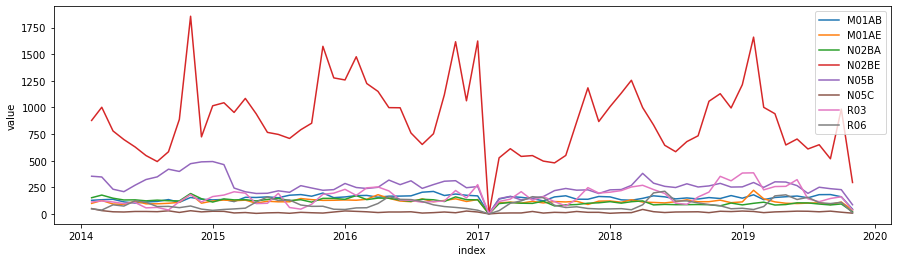

In [45]:
df2 = df.copy()
df2.index.name = 'index'
df2 = df2.reset_index().melt(id_vars='index')
display(df2.head())

plt.figure(figsize=(15,4))

sns.lineplot(x='index', y='value', data=df2, hue='variable')

plt.legend()
plt.show()

In [46]:
df.to_csv('pharma.csv')

df_check = pd.read_csv('pharma.csv',index_col=0)
display( df_check.head() )

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


# **CO₂ emissions dataset**

Original Source: https://ourworldindata.org/co2-dataset-sources

Date: 03/09/2022

Description

Emissões de CO2 (anuais, per capita, cumulativas e baseadas no consumo), outros gases de efeito estufa, mix de energia e outras métricas relevantes.






In [47]:
df = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv')
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1949,AFG,7624058.0,NaN,NaN,NaN,0.015,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1950,AFG,7752117.0,9.421400e+09,NaN,NaN,0.084,0.070,475.0,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1951,AFG,7840151.0,9.692280e+09,NaN,NaN,0.092,0.007,8.7,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1952,AFG,7935996.0,1.001733e+10,NaN,NaN,0.092,0.000,0.0,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1953,AFG,8039684.0,1.063052e+10,NaN,NaN,0.106,0.015,16.0,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


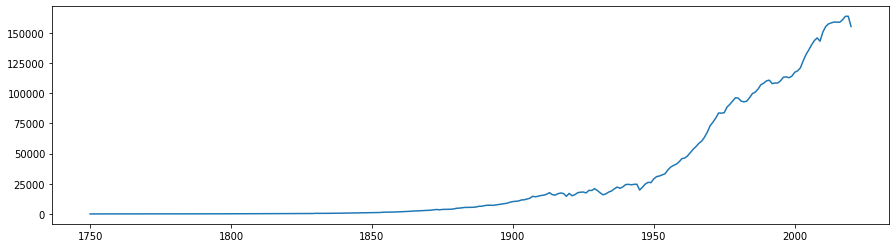

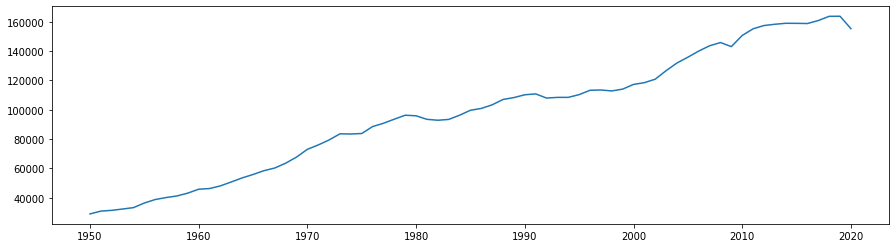

In [48]:
plt.figure(figsize=(15,4))

plt.plot(np.arange(df.year.min(),df.year.max()+1), df.groupby('year').co2.sum())
plt.show()

plt.figure(figsize=(15,4))

plt.plot(np.arange(1950,df.year.max()+1), df[df.year >= 1950].groupby('year').co2.sum())
plt.show()

# **Data on Energy by Our World in Data**

Original Source: https://github.com/owid/energy-data

Date: 03/09/2022

Description

Consumo e produção de energia global de 1900-2021, por país e por fonte de energia.

In [49]:
df = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/energy/owid-energy-data.csv')
# df = df[ df.country == 'Brazil' ]
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,1900,AFG,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,AFG,4998861.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,AFG,5063419.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
print(df.year.min(), df.year.max())

1900 2021


In [51]:
[x for x in df.columns if 'solar' in x]

['solar_cons_change_pct',
 'solar_cons_change_twh',
 'solar_consumption',
 'solar_elec_per_capita',
 'solar_electricity',
 'solar_energy_per_capita',
 'solar_share_elec',
 'solar_share_energy']

In [52]:
[x.split('_')[0] for x in df.columns if '_consumption' in x]

['biofuel',
 'coal',
 'fossil',
 'gas',
 'hydro',
 'low',
 'nuclear',
 'oil',
 'other',
 'primary',
 'renewables',
 'solar',
 'wind']

In [53]:
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=128)

In [54]:
df2 = df[['year'] + [x for x in df.columns if '_consumption' in x]].groupby(['year']).sum().reset_index() 
df2.index = pd.to_datetime(df2.year,format='%Y')
df2.index.name = ''
df2 = df2.drop(columns='year')

from datetime import datetime as dt
df2 = df2[df2.index >= dt.strptime('1968', '%Y')]
df2.head()

,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
,,,,,,,,,,,,,
1968-01-01,38.216,101923.720,290329.827,48791.133,19380.926,20756.618,908.859,139660.474,428.617,311151.055,19847.760,0.0,0.0
1969-01-01,38.896,105002.816,310105.053,53682.306,20465.377,22039.576,1084.194,151467.250,451.107,332211.400,20955.381,0.0,0.0
1970-01-01,44.157,106506.149,330016.077,58537.494,21436.630,23374.349,1390.350,165021.679,503.217,353461.770,21984.001,0.0,0.0
1971-01-01,46.599,105787.513,342830.878,62781.744,22357.503,24879.206,1929.823,174263.472,545.278,367735.239,22949.379,0.0,0.0
1972-01-01,51.788,106877.063,360703.913,66397.131,23399.007,26719.854,2687.903,187431.635,581.156,387451.592,24031.955,0.0,0.0


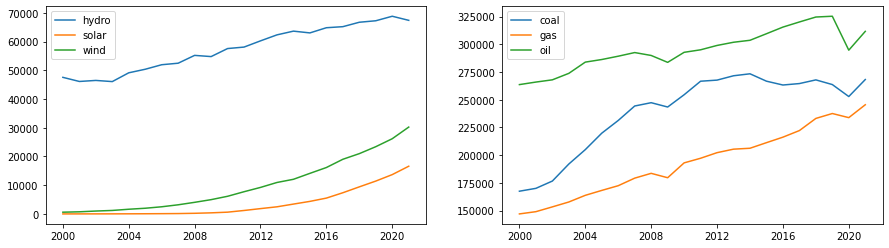

In [55]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
for type_cons in df2:
#  if type_cons.split('_')[0] not in ['fossil','other','renewables','low','primary']:
  if type_cons.split('_')[0] in ['wind','solar','hydro']:
    plt.plot(df2[ df2.index >= dt.strptime('2000', '%Y') ][type_cons], label=type_cons.split('_')[0])
plt.legend()

plt.subplot(1,2,2)
for type_cons in df2:
#  if type_cons.split('_')[0] not in ['fossil','other','renewables','low','primary']:
  if type_cons.split('_')[0] in ['gas','oil','coal']:
    plt.plot(df2[ df2.index >= dt.strptime('2000', '%Y') ][type_cons], label=type_cons.split('_')[0])
plt.legend()

plt.show()



# **US Accidents (2016 - 2021)**

Original Source: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

Date: 04/09/2022

Description

Este é um conjunto de dados de acidentes de carro que abrange 49 estados dos EUA de 2016 a 2021. 






In [56]:
!kaggle datasets download -d sobhanmoosavi/us-accidents --force

 99% 265M/269M [00:07<00:00, 63.3MB/s]
100% 269M/269M [00:07<00:00, 39.6MB/s]


In [57]:
!ls /content


'Annual CSV REVISED 2019-20 published Jun 2020.csv'	   saleshourly.csv
 Annual-CSV-REVISED-2019-20-published-Jun-2020-g3XA1.zip   salesmonthly.csv
 kaggle.json						   salesweekly.csv
 pharma.csv						   sample_data
 pharma-sales-data.zip					   us-accidents.zip
 salesdaily.csv


In [58]:
!unzip us-accidents.zip
!ls /content

Archive:  us-accidents.zip
  inflating: US_Accidents_Dec21_updated.csv  
'Annual CSV REVISED 2019-20 published Jun 2020.csv'
 Annual-CSV-REVISED-2019-20-published-Jun-2020-g3XA1.zip
 kaggle.json
 pharma.csv
 pharma-sales-data.zip
 salesdaily.csv
 saleshourly.csv
 salesmonthly.csv
 salesweekly.csv
 sample_data
 US_Accidents_Dec21_updated.csv
 us-accidents.zip


In [59]:
df = pd.read_csv('US_Accidents_Dec21_updated.csv')
display( df.head() )
print(df.shape)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


(2845342, 47)


In [60]:
df.index = pd.to_datetime(df.Start_Time)
df.index.name = ''
display( df.head() )
print(df.index.min(), df.index.max())

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 05:56:20,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 06:15:39,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
2016-02-08 06:51:45,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
2016-02-08 07:53:43,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


2016-01-14 20:18:33 2021-12-31 23:30:00


In [61]:
df.index = pd.to_datetime(df.Start_Time)
df.index.name = ''
display( df.head() )
print(df.index.min(), df.index.max())

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 05:56:20,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 06:15:39,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
2016-02-08 06:51:45,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
2016-02-08 07:53:43,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


2016-01-14 20:18:33 2021-12-31 23:30:00


In [62]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [63]:
df = df[['ID', 'Severity', 'State', 'Weather_Condition']]
df.head()

,ID,Severity,State,Weather_Condition
,,,,
2016-02-08 00:37:08,A-1,3,OH,Light Rain
2016-02-08 05:56:20,A-2,2,OH,Light Rain
2016-02-08 06:15:39,A-3,2,OH,Overcast
2016-02-08 06:51:45,A-4,2,OH,Overcast
2016-02-08 07:53:43,A-5,3,OH,Light Rain


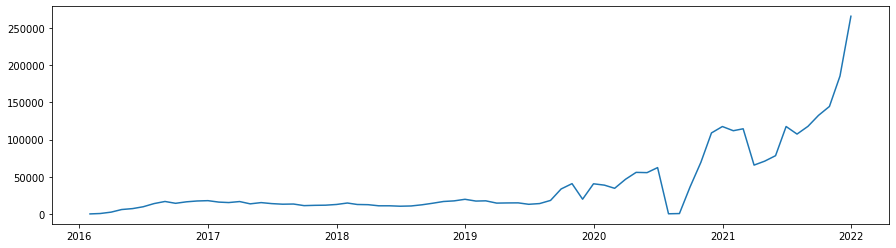

In [64]:
df2 = df[['ID']].resample('M').count()

plt.figure(figsize=(15,4))

plt.plot(df2)
plt.show()

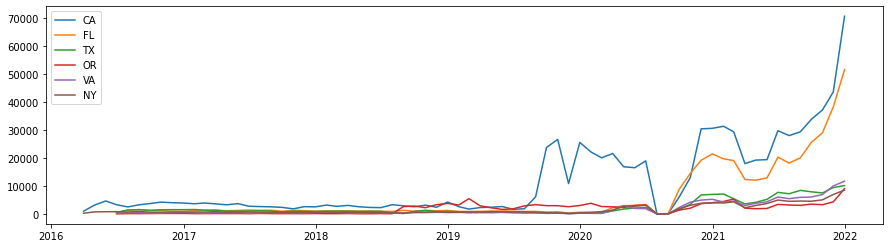

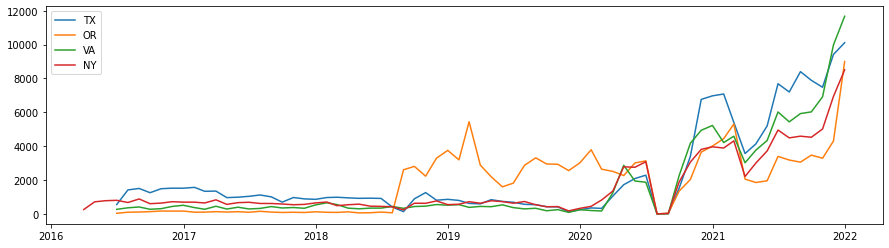

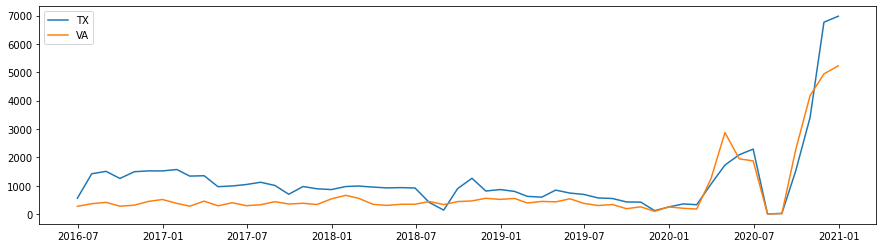

In [65]:
plt.figure(figsize=(15,4))

for state in ['CA','FL','TX','OR','VA','NY']:
  df2 = df[ df.State == state ][['ID']].resample('M').count()
  plt.plot(df2, label=state)

plt.legend()
plt.show()

plt.figure(figsize=(15,4))

for state in ['TX','OR','VA','NY']:
  df2 = df[ df.State == state ][['ID']].resample('M').count()
  plt.plot(df2, label=state)

plt.legend()
plt.show()

plt.figure(figsize=(15,4))

for state in ['TX','VA']:
  df2 = df[ (df.index.year <= 2020) & (df.State == state) ][['ID']].resample('M').count()
  plt.plot(df2, label=state)

plt.legend()
plt.show()

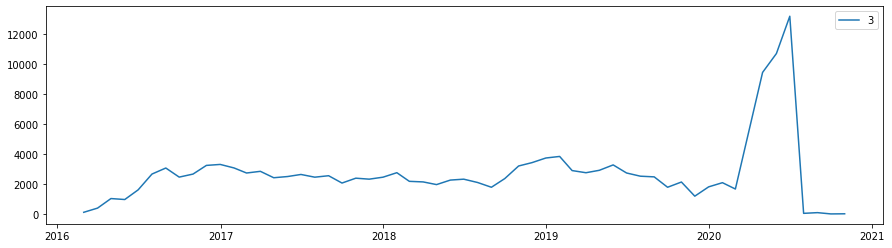

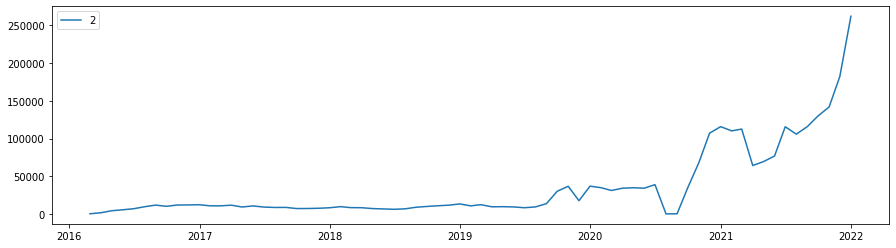

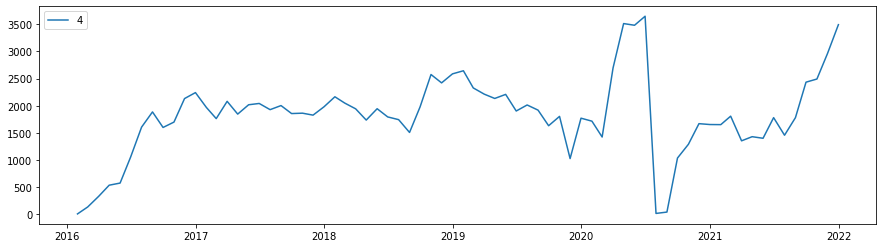

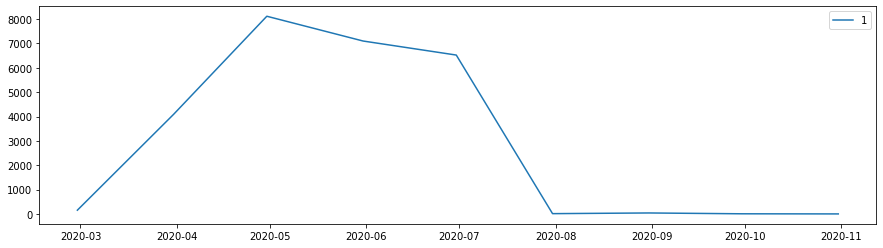

In [66]:


for severity in df.Severity.unique():
  plt.figure(figsize=(15,4))
  df2 = df[ df.Severity == severity ][['ID']].resample('M').count()
  plt.plot(df2, label=severity)
  plt.legend()
  plt.show()


# **Predict Future Sales**

Original Source: https://www.kaggle.com/competitions/competitive-data-science-predict-future-sales/data

Date: 04/09/2022

Description

Dados históricos diários de vendas. 






In [67]:
!kaggle competitions download -c competitive-data-science-predict-future-sales

 60% 9.00M/15.1M [00:00<00:00, 22.6MB/s]
100% 15.1M/15.1M [00:00<00:00, 34.3MB/s]


In [68]:
!ls /content


'Annual CSV REVISED 2019-20 published Jun 2020.csv'
 Annual-CSV-REVISED-2019-20-published-Jun-2020-g3XA1.zip
 competitive-data-science-predict-future-sales.zip
 kaggle.json
 pharma.csv
 pharma-sales-data.zip
 salesdaily.csv
 saleshourly.csv
 salesmonthly.csv
 salesweekly.csv
 sample_data
 US_Accidents_Dec21_updated.csv
 us-accidents.zip


In [69]:
!unzip competitive-data-science-predict-future-sales.zip
!ls /content

Archive:  competitive-data-science-predict-future-sales.zip
  inflating: item_categories.csv     
  inflating: items.csv               
  inflating: sales_train.csv         
  inflating: sample_submission.csv   
  inflating: shops.csv               
  inflating: test.csv                
'Annual CSV REVISED 2019-20 published Jun 2020.csv'
 Annual-CSV-REVISED-2019-20-published-Jun-2020-g3XA1.zip
 competitive-data-science-predict-future-sales.zip
 item_categories.csv
 items.csv
 kaggle.json
 pharma.csv
 pharma-sales-data.zip
 salesdaily.csv
 saleshourly.csv
 salesmonthly.csv
 sales_train.csv
 salesweekly.csv
 sample_data
 sample_submission.csv
 shops.csv
 test.csv
 US_Accidents_Dec21_updated.csv
 us-accidents.zip


In [70]:
df = pd.read_csv('sales_train.csv')
display( df.head() )
print(df.shape)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


(2935849, 6)


In [71]:
df.index = pd.to_datetime( df['date'] )


In [72]:
df2 = pd.DataFrame( df.groupby(df.index).item_cnt_day.sum() )
df2.head()

,item_cnt_day
date,
2013-01-01,1951.0
2013-01-02,3817.0
2013-01-03,3846.0
2013-01-04,2574.0
2013-01-05,4863.0


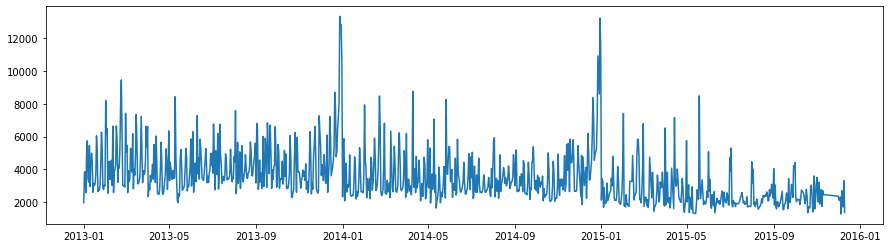

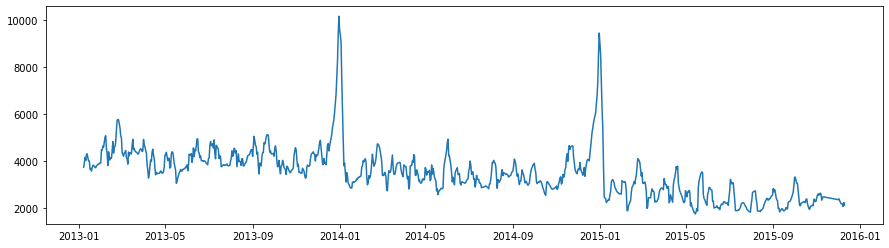

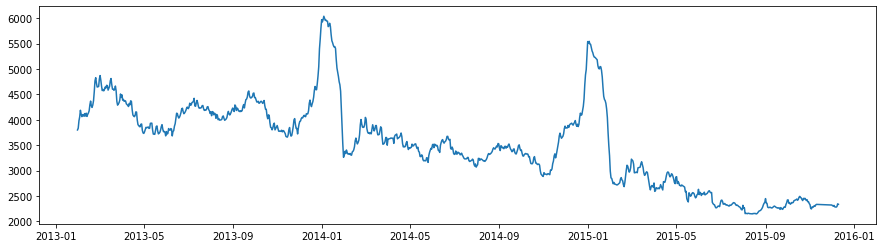

In [73]:
plt.figure(figsize=(15,4))
plt.plot(df2.item_cnt_day)
plt.show()

plt.figure(figsize=(15,4))
plt.plot(df2.rolling(7).mean())
plt.show()

plt.figure(figsize=(15,4))
plt.plot(df2.rolling(30).mean())
plt.show()

# **(fpp2) Quarterly Australian Beer production**

Original Source: https://vincentarelbundock.github.io/Rdatasets/datasets.html

Date: 04/09/2022

Description

Quarterly Australian Beer production. 






In [74]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/fpp2/ausbeer.csv',index_col=0)
df.head()

,time,value
1,1956.00,284
2,1956.25,213
3,1956.50,227
4,1956.75,308
5,1957.00,262


In [75]:
df.time.max()

2010.25

In [76]:
df.index = pd.date_range(start='1/1/1956', end='7/1/2010', freq='Q')
display( df.head() )
display( df.tail() )

,time,value
1956-03-31,1956.00,284
1956-06-30,1956.25,213
1956-09-30,1956.50,227
1956-12-31,1956.75,308
1957-03-31,1957.00,262


,time,value
2009-06-30,2009.25,398
2009-09-30,2009.50,419
2009-12-31,2009.75,488
2010-03-31,2010.00,414
2010-06-30,2010.25,374


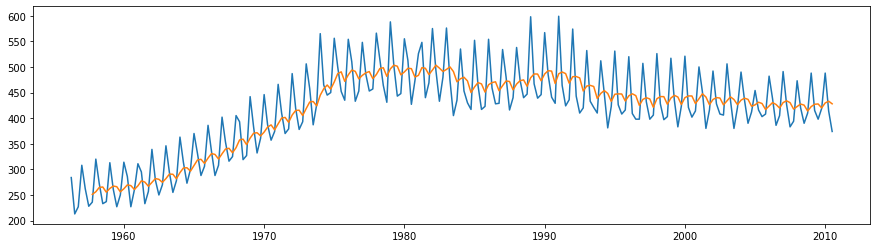

In [77]:
plt.figure(figsize=(15,4))
plt.plot(df.value)
plt.plot(df.rolling(7).value.mean())
plt.show()



# **(nzbop) New Zealand Balance of Payments major components 1971Q2 to 2015Q2**

Original Source: https://www.rdocumentation.org/packages/ggseas/versions/0.5.4/topics/nzbop

Date: 04/09/2022

Description

New Zealand's "BPM6 Quarterly, Balance of payments major components (Qrtly-Mar/Jun/Sep/Dec)". "BPM6" refers to the sixth edition of the IMF's Balance of Payments and International Investment Position Manual, which is the method used by Statistics New Zealand to prepare these data.


</pre>
<table>
<thead>
<tr>
<th align="left">Account</th>
<th align="left">Category</th>
<th align="left">Type</th>
</tr>
</thead>
<tbody>
<tr>
<td align="left">Current account</td>
<td align="left">Inflow total</td>
<td align="left">Additive</td>
</tr>
<tr>
<td align="left">Current account</td>
<td align="left">Balance</td>
<td align="left">Multiplicative</td>
</tr>
<tr>
<td align="left">Current account</td>
<td align="left">Goods; Exports (fob) total</td>
<td align="left">Additive</td>
</tr>
<tr>
<td align="left">Current account</td>
<td align="left">Services; Exports total</td>
<td align="left">Multiplicative</td>
</tr>
<tr>
<td align="left">Current account</td>
<td align="left">Primary income; Inflow total</td>
<td align="left">Multiplicative</td>
</tr>
<tr>
<td align="left">Current account</td>
<td align="left">Secondary income; Inflow total</td>
<td align="left">Multiplicative</td>
</tr>
<tr>
<td align="left">Current account</td>
<td align="left">Goods balance</td>
<td align="left">Multiplicative</td>
</tr>
<tr>
<td align="left">Current account</td>
<td align="left">Services balance</td>
<td align="left">Multiplicative</td>
</tr>
<tr>
<td align="left">Current account</td>
<td align="left">Primary income balance</td>
<td align="left">Additive</td>
</tr>
<tr>
<td align="left">Current account</td>
<td align="left">Outflow total</td>
<td align="left">Additive</td>
</tr>
<tr>
<td align="left">Current account</td>
<td align="left">Goods; Imports (fob) total</td>
<td align="left">Additive</td>
</tr>
<tr>
<td align="left">Current account</td>
<td align="left">Services; Imports total</td>
<td align="left">Additive</td>
</tr>
<tr>
<td align="left">Current account</td>
<td align="left">Primary income; Outflow total</td>
<td align="left">Additive</td>
</tr>
<tr>
<td align="left">Current account</td>
<td align="left">Secondary income; Outflow total</td>
<td align="left">Multiplicative</td>
</tr>
<tr>
<td align="left">Capital account</td>
<td align="left">Inflow total</td>
<td align="left">Multiplicative</td>
</tr>
<tr>
<td align="left">Capital account</td>
<td align="left">Outflow total</td>
<td align="left">Multiplicative</td>
</tr>
<tr>
<td align="left">NA</td>
<td align="left">Net errors and omissions</td>
<td align="left">Multiplicative</td>
</tr>
<tr>
<td align="left">Financial account</td>
<td align="left">Foreign inv. in NZ total</td>
<td align="left">Multiplicative</td>
</tr>
<tr>
<td align="left">Financial account</td>
<td align="left">Balance</td>
<td align="left">Additive</td>
</tr>
<tr>
<td align="left">Financial account</td>
<td align="left">Foreign inv. in NZ; Direct inv. liabilities</td>
<td align="left">Additive</td>
</tr>
<tr>
<td align="left">Financial account</td>
<td align="left">Foreign inv. in NZ; Portfolio inv. liabilities</td>
<td align="left">Multiplicative</td>
</tr>
<tr>
<td align="left">Financial account</td>
<td align="left">Foreign inv. in NZ; Other inv. liabilities</td>
<td align="left">Multiplicative</td>
</tr>
<tr>
<td align="left">Financial account</td>
<td align="left">NZ inv. abroad total</td>
<td align="left">Multiplicative</td>
</tr>
<tr>
<td align="left">Financial account</td>
<td align="left">NZ inv. abroad; Direct inv. assets</td>
<td align="left">Multiplicative</td>
</tr>
<tr>
<td align="left">Financial account</td>
<td align="left">NZ inv. abroad; Portfolio inv. assets</td>
<td align="left">Additive</td>
</tr>
<tr>
<td align="left">Financial account</td>
<td align="left">NZ inv. abroad; Financial derivative assets</td>
<td align="left">Multiplicative</td>
</tr>
<tr>
<td align="left">Financial account</td>
<td align="left">NZ inv. abroad; Other inv. assets</td>
<td align="left">Additive</td>
</tr>
<tr>
<td align="left">Financial account</td>
<td align="left">NZ inv. abroad; Reserve assets</td>
<td align="left">Multiplicative</td>
</tr>
</tbody>
</table>

In [78]:
%load_ext rpy2.ipython

In [79]:
%%R
if(!require("ggseas")) install.packages("ggseas")
if(!require("forecast")) install.packages("forecast")
if(!require("data.table")) install.packages("data.table")
if(!require("knitr")) install.packages("knitr")

library(ggseas)
library(forecast)
library(data.table)


(as ‘lib’ is unspecified)
























	‘/tmp/RtmpiH4UPA/downloaded_packages’


(as ‘lib’ is unspecified)
































































	‘/tmp/RtmpiH4UPA/downloaded_packages’





  method            from
  as.zoo.data.frame zoo 



In [80]:
# Get data
%%R
nzdata = data.table(nzbop)
nzdata = nzdata[!((Account=="Capital account"&
                               Category=="Balance")|
                 (Account=="Financial account"&
                               Category=="Foreign inv. in NZ; Financial derivative liabilities")|
                 (Category=="Secondary income balance")),]

sample_ts = nzdata[Account == "Current account" & Category=="Services; Exports total",
                  .(TimePeriod, Value)]

print( nzdata )
print('-------------------------------------------------------------------------')
print( sample_ts )

      TimePeriod           Account                        Category Value
   1: 1971-06-30   Current account                    Inflow total   426
   2: 1971-06-30   Current account                         Balance    35
   3: 1971-06-30   Current account      Goods; Exports (fob) total   350
   4: 1971-06-30   Current account         Services; Exports total    55
   5: 1971-06-30   Current account    Primary income; Inflow total     9
  ---                                                                   
3357: 2015-06-30 Financial account  NZ inv. abroad; Reserve assets  -144
3358: 2015-06-30   Current account      Goods; Imports (fob) total 12058
3359: 2015-06-30   Current account         Services; Imports total  4055
3360: 2015-06-30   Current account   Primary income; Outflow total  4333
3361: 2015-06-30   Current account Secondary income; Outflow total   634
      Balance
   1:   FALSE
   2:    TRUE
   3:   FALSE
   4:   FALSE
   5:   FALSE
  ---        
3357:   FALSE
3358:   FALS

In [81]:
%%R
df = data.frame(nzdata)
head(df)

  TimePeriod         Account                       Category Value Balance
1 1971-06-30 Current account                   Inflow total   426   FALSE
2 1971-06-30 Current account                        Balance    35    TRUE
3 1971-06-30 Current account     Goods; Exports (fob) total   350   FALSE
4 1971-06-30 Current account        Services; Exports total    55   FALSE
5 1971-06-30 Current account   Primary income; Inflow total     9   FALSE
6 1971-06-30 Current account Secondary income; Inflow total    12   FALSE


In [82]:
%%R
# Current account	Inflow total	Additive
# Current account	Services; Exports total	Multiplicative

df_additive = nzdata[Account == "Current account" & Category=="Inflow total",
                    .(TimePeriod, Value)]
                    
df_multiplicative = nzdata[Account == "Current account" & Category=="Services; Exports total",
                    .(TimePeriod, Value)]

write.csv(df_additive, '/content/df_additive.csv')
write.csv(df_multiplicative, '/content/df_multiplicative.csv')


In [83]:
df_additive = pd.read_csv('/content/df_additive.csv',index_col=0)
df_multiplicative = pd.read_csv('/content/df_multiplicative.csv',index_col=0)

df_additive.TimePeriod = pd.to_datetime(df_additive.TimePeriod)
df_multiplicative.TimePeriod = pd.to_datetime(df_multiplicative.TimePeriod)

df_additive.set_index('TimePeriod',drop=True,inplace=True)
df_multiplicative.set_index('TimePeriod',drop=True,inplace=True)

display(df_additive.head())
display(df_multiplicative.head())

,Value
TimePeriod,
1971-06-30,426
1971-09-30,435
1971-12-31,360
1972-03-31,417
1972-06-30,528


,Value
TimePeriod,
1971-06-30,55
1971-09-30,56
1971-12-31,60
1972-03-31,65
1972-06-30,65


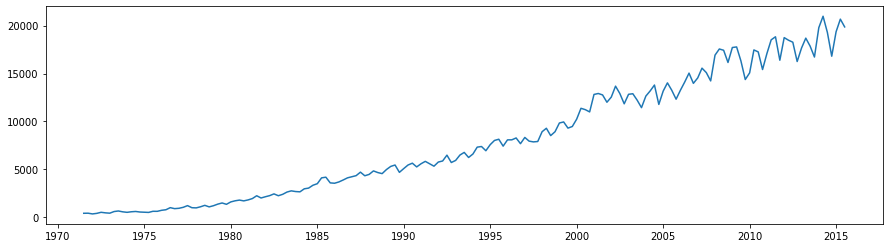

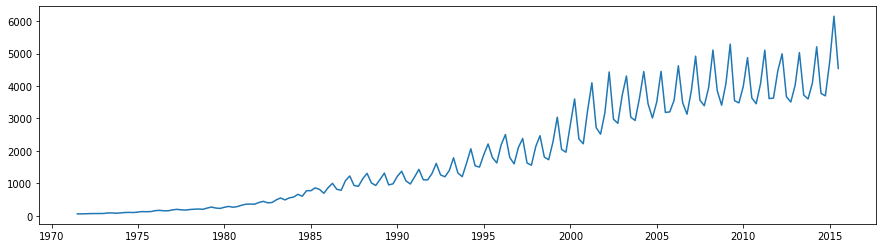

In [84]:
plt.figure(figsize=(15,4))
plt.plot(df_additive.Value)
plt.show()

plt.figure(figsize=(15,4))
plt.plot(df_multiplicative.Value)
plt.show()

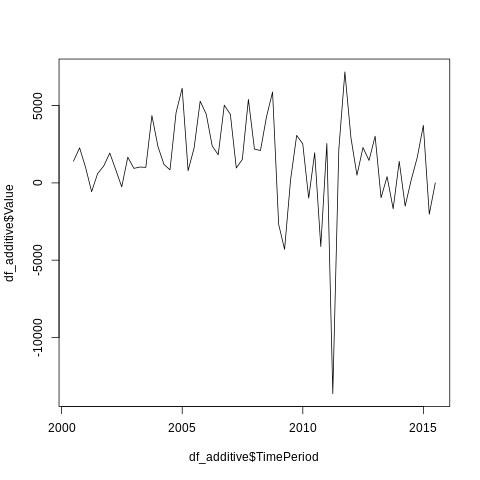

In [85]:
%%R
df_additive = nzdata[Account == "Financial account" & Category=="Balance",
                    .(TimePeriod, Value)]

# write.csv(df_additive, '/content/df_additive.csv')
head(df_additive)
plot(df_additive$TimePeriod, df_additive$Value,type='l')

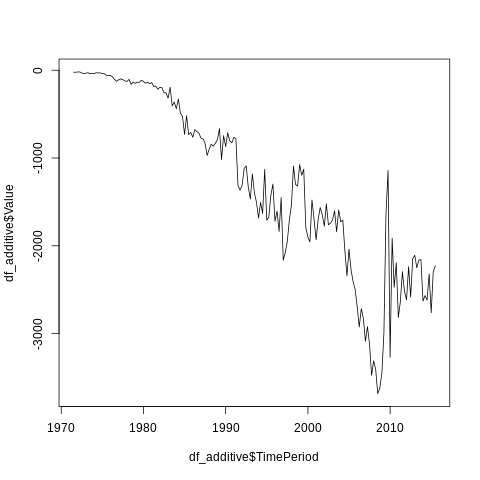

In [86]:
%%R
df_additive = nzdata[Account == "Current account" & Category=="Primary income balance",
                    .(TimePeriod, Value)]

# write.csv(df_additive, '/content/df_additive.csv')
head(df_additive)
plot(df_additive$TimePeriod, df_additive$Value,type='l')

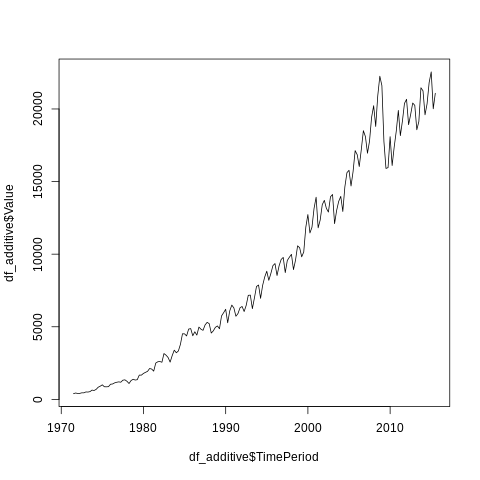

In [87]:
%%R
df_additive = nzdata[Account == "Current account" & Category=="Outflow total",
                    .(TimePeriod, Value)]

# write.csv(df_additive, '/content/df_additive.csv')
head(df_additive)
plot(df_additive$TimePeriod, df_additive$Value,type='l')

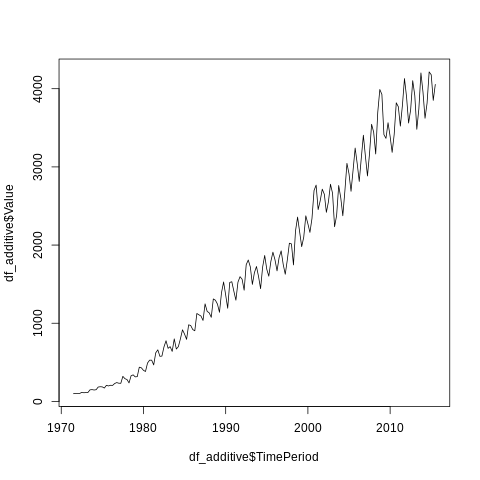

In [88]:
%%R
df_additive = nzdata[Account == "Current account" & Category=="Services; Imports total",
                    .(TimePeriod, Value)]

# write.csv(df_additive, '/content/df_additive.csv')
head(df_additive)
plot(df_additive$TimePeriod, df_additive$Value,type='l')

# **(IoT) Sensor Based Aquaponics Fish Pond Datasets**

Original Source: https://www.kaggle.com/datasets/ogbuokiriblessing/sensor-based-aquaponics-fish-pond-datasets

Date: 04/09/2022

Description

Dados de monitoramento de tanques de peixes-gato de aquaponia de água doce. Os  dados são gerados automaticamente em intervalos de 5 segundos usando os seguintes sensores de qualidade da água acionados por um microcontrolador.






In [89]:
!kaggle datasets download -d ogbuokiriblessing/sensor-based-aquaponics-fish-pond-datasets

 31% 5.00M/15.9M [00:01<00:03, 3.59MB/s]
100% 15.9M/15.9M [00:01<00:00, 11.1MB/s]


In [90]:
!ls /content


'Annual CSV REVISED 2019-20 published Jun 2020.csv'
 Annual-CSV-REVISED-2019-20-published-Jun-2020-g3XA1.zip
 competitive-data-science-predict-future-sales.zip
 df_additive.csv
 df_multiplicative.csv
 item_categories.csv
 items.csv
 kaggle.json
 pharma.csv
 pharma-sales-data.zip
 salesdaily.csv
 saleshourly.csv
 salesmonthly.csv
 sales_train.csv
 salesweekly.csv
 sample_data
 sample_submission.csv
 sensor-based-aquaponics-fish-pond-datasets.zip
 shops.csv
 test.csv
 US_Accidents_Dec21_updated.csv
 us-accidents.zip


In [91]:
!unzip sensor-based-aquaponics-fish-pond-datasets.zip
!ls /content

Archive:  sensor-based-aquaponics-fish-pond-datasets.zip
  inflating: IoTPond10.csv           
  inflating: IoTPond11.csv           
  inflating: IoTPond12.csv           
  inflating: IoTPond2.csv            
  inflating: IoTPond3.csv            
  inflating: IoTPond4.csv            
  inflating: IoTPond6.csv            
  inflating: IoTPond7.csv            
  inflating: IoTPond8.csv            
  inflating: IoTPond9.csv            
  inflating: IoTpond1.csv            
'Annual CSV REVISED 2019-20 published Jun 2020.csv'
 Annual-CSV-REVISED-2019-20-published-Jun-2020-g3XA1.zip
 competitive-data-science-predict-future-sales.zip
 df_additive.csv
 df_multiplicative.csv
 IoTPond10.csv
 IoTPond11.csv
 IoTPond12.csv
 IoTpond1.csv
 IoTPond2.csv
 IoTPond3.csv
 IoTPond4.csv
 IoTPond6.csv
 IoTPond7.csv
 IoTPond8.csv
 IoTPond9.csv
 item_categories.csv
 items.csv
 kaggle.json
 pharma.csv
 pharma-sales-data.zip
 salesdaily.csv
 saleshourly.csv
 salesmonthly.csv
 sales_train.csv
 salesweekly.csv
 sa

In [92]:
df = pd.read_csv('IoTPond10.csv')
display( df.head() )
print(df.shape)
display( df.tail() )

,created_at,entry_id,TEMPERATURE,TURBIDITY,DISOLVED OXYGEN,pH,AMMONIA,NITRATE,Population,Length,Weight
0,2021-06-25 15:48:59 CET,1,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6
1,2021-06-25 15:49:19 CET,2,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6
2,2021-06-25 15:50:16 CET,3,27.1250,100,0.0,6.01411,0.0,139,50,13.45,27.6
3,2021-06-25 15:51:50 CET,4,27.3125,100,0.0,6.03227,0.0,131,50,13.45,27.6
4,2021-06-25 15:52:10 CET,5,27.2500,100,0.0,6.03681,0.0,133,50,13.45,27.6


(620, 11)


,created_at,entry_id,TEMPERATURE,TURBIDITY,DISOLVED OXYGEN,pH,AMMONIA,NITRATE,Population,Length,Weight
615,5/12/2021,616,26.7500,-13,1.484,3.17695,0.0,184,50,44.54929,689.1429
616,5/12/2021,617,26.8125,-13,0.601,3.19056,0.0,193,50,44.54929,689.1429
617,5/12/2021,618,26.8125,-13,0.571,3.19964,0.0,187,50,44.54929,689.1429
618,5/12/2021,619,-127.0000,95,0.000,15.45166,0.0,0,50,44.54929,689.1429
619,5/12/2021,620,-127.0000,95,0.000,15.45166,0.0,0,50,44.54929,689.1429


In [93]:
display( df[ df.created_at.str.contains('CET') ].head() )
display( df[ df.created_at.str.contains('CET') ].tail() )

,created_at,entry_id,TEMPERATURE,TURBIDITY,DISOLVED OXYGEN,pH,AMMONIA,NITRATE,Population,Length,Weight
0,2021-06-25 15:48:59 CET,1,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6
1,2021-06-25 15:49:19 CET,2,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6
2,2021-06-25 15:50:16 CET,3,27.1250,100,0.0,6.01411,0.0,139,50,13.45,27.6
3,2021-06-25 15:51:50 CET,4,27.3125,100,0.0,6.03227,0.0,131,50,13.45,27.6
4,2021-06-25 15:52:10 CET,5,27.2500,100,0.0,6.03681,0.0,133,50,13.45,27.6


,created_at,entry_id,TEMPERATURE,TURBIDITY,DISOLVED OXYGEN,pH,AMMONIA,NITRATE,Population,Length,Weight
305,2021-10-06 12:51:04 CET,306,26.7500,-13,1.484,3.17695,0.0,184,50,16.514286,54.064234
306,2021-10-06 12:51:24 CET,307,26.8125,-13,0.601,3.19056,0.0,193,50,16.514286,54.064234
307,2021-10-06 12:51:44 CET,308,26.8125,-13,0.571,3.19964,0.0,187,50,16.514286,54.064234
308,2021-10-06 12:52:32 CET,309,-127.0000,95,0.000,15.45166,0.0,0,50,16.514286,54.064234
309,2021-10-06 12:52:52 CET,310,-127.0000,95,0.000,15.45166,0.0,0,50,16.514286,54.064234


In [94]:
display( df[ - df.created_at.str.contains('CET') ].head() )
display( df[ - df.created_at.str.contains('CET') ].tail() )

,created_at,entry_id,TEMPERATURE,TURBIDITY,DISOLVED OXYGEN,pH,AMMONIA,NITRATE,Population,Length,Weight
310,10/10/2021,311,-127.0000,100,0.0,15.45166,0.0,0,50,31.7,263.0
311,10/10/2021,312,-127.0000,100,0.0,15.45166,0.0,0,50,31.7,263.0
312,10/10/2021,313,27.1250,100,0.0,6.01411,0.0,139,50,31.7,263.0
313,10/10/2021,314,27.3125,100,0.0,6.03227,0.0,131,50,31.7,263.0
314,10/10/2021,315,27.2500,100,0.0,6.03681,0.0,133,50,31.7,263.0


,created_at,entry_id,TEMPERATURE,TURBIDITY,DISOLVED OXYGEN,pH,AMMONIA,NITRATE,Population,Length,Weight
615,5/12/2021,616,26.7500,-13,1.484,3.17695,0.0,184,50,44.54929,689.1429
616,5/12/2021,617,26.8125,-13,0.601,3.19056,0.0,193,50,44.54929,689.1429
617,5/12/2021,618,26.8125,-13,0.571,3.19964,0.0,187,50,44.54929,689.1429
618,5/12/2021,619,-127.0000,95,0.000,15.45166,0.0,0,50,44.54929,689.1429
619,5/12/2021,620,-127.0000,95,0.000,15.45166,0.0,0,50,44.54929,689.1429


In [95]:
df = df[ df.created_at.str.contains('CET') ]

In [96]:
df.set_index( pd.to_datetime( df.created_at ) ,drop=True, inplace=True )

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [97]:
df.head()

,created_at,entry_id,TEMPERATURE,TURBIDITY,DISOLVED OXYGEN,pH,AMMONIA,NITRATE,Population,Length,Weight
created_at,,,,,,,,,,,
2021-06-25 15:48:59,2021-06-25 15:48:59 CET,1,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6
2021-06-25 15:49:19,2021-06-25 15:49:19 CET,2,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6
2021-06-25 15:50:16,2021-06-25 15:50:16 CET,3,27.1250,100,0.0,6.01411,0.0,139,50,13.45,27.6
2021-06-25 15:51:50,2021-06-25 15:51:50 CET,4,27.3125,100,0.0,6.03227,0.0,131,50,13.45,27.6
2021-06-25 15:52:10,2021-06-25 15:52:10 CET,5,27.2500,100,0.0,6.03681,0.0,133,50,13.45,27.6


In [98]:
df.groupby(df.index.day).entry_id.count()

created_at
1       7
6      44
7      26
12     96
22     14
24      4
25    112
26      1
27      1
28      1
29      3
30      1
Name: entry_id, dtype: int64

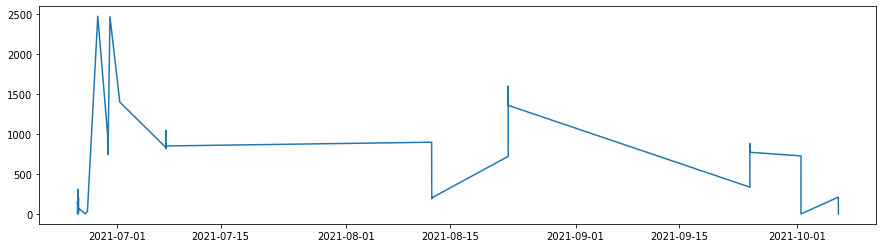

In [99]:
plt.figure(figsize=(15,4))

plt.plot( df.index, df.NITRATE)
plt.show()

In [100]:
df = pd.read_csv('IoTpond1.csv')
df.set_index( pd.to_datetime( df.created_at ) ,drop=True, inplace=True )

display( df.head() )
print(df.shape)
display( df.tail() )

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


,created_at,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
created_at,,,,,,,,,,,
2021-06-19 00:00:05,2021-06-19 00:00:05 CET,1889,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91
2021-06-19 00:01:02,2021-06-19 00:01:02 CET,1890,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91
2021-06-19 00:01:22,2021-06-19 00:01:22 CET,1891,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91
2021-06-19 00:01:44,2021-06-19 00:01:44 CET,1892,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91
2021-06-19 00:02:07,2021-06-19 00:02:07 CET,1893,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91


(83126, 11)


,created_at,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
created_at,,,,,,,,,,,
2021-10-13 02:48:31,2021-10-13 02:48:31 CET,247201,26.5625,100,0.441,2.56412,5.91282,946,50,33.45,318.64
2021-10-13 03:17:36,2021-10-13 03:17:36 CET,247273,26.5625,100,1.020,2.67760,4.21414,985,50,33.45,318.64
2021-10-13 03:46:49,2021-10-13 03:46:49 CET,247336,26.5000,100,0.852,2.45063,8.18873,963,50,33.45,318.64
2021-10-13 04:13:23,2021-10-13 04:13:23 CET,247402,26.3750,100,4.850,2.41885,10.62411,944,50,33.45,318.64
2021-10-13 04:14:22,2021-10-13 04:14:22 CET,247405,26.3750,100,1.279,2.40524,10.07556,943,50,33.45,318.64


In [101]:
df.groupby(df.index.day).entry_id.count()

created_at
1     4741
2     4885
3     2207
4     1921
5     2783
6        3
7     1394
8     2296
9     1877
10    4394
11    4421
12    3961
13    4236
14    4127
15    1569
16     556
17    1325
18     917
19    4032
20    3643
21    1334
22    1564
23    3166
24    2059
25    1758
26     757
27     951
28    2224
29    5341
30    5949
31    2735
Name: entry_id, dtype: int64

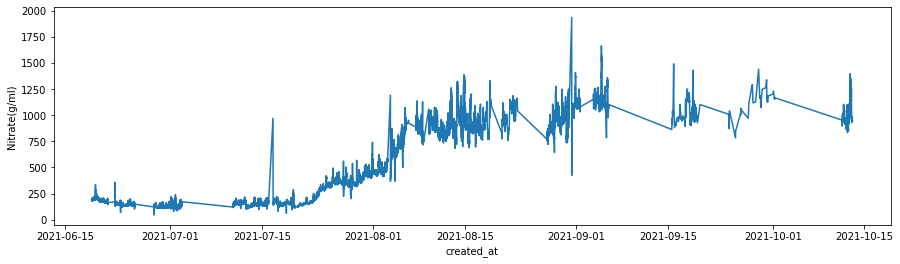

In [102]:
plt.figure(figsize=(15,4))

sns.lineplot(x=df.index, y=df['Nitrate(g/ml)'])
plt.show()

In [103]:
df[['Nitrate(g/ml)']].resample('D').mean()

,Nitrate(g/ml)
created_at,
2021-06-19,201.838762
2021-06-20,184.574415
2021-06-21,172.322064
2021-06-22,151.653780
2021-06-23,146.988419
...,...
2021-10-09,NaN
2021-10-10,NaN
2021-10-11,1012.521739


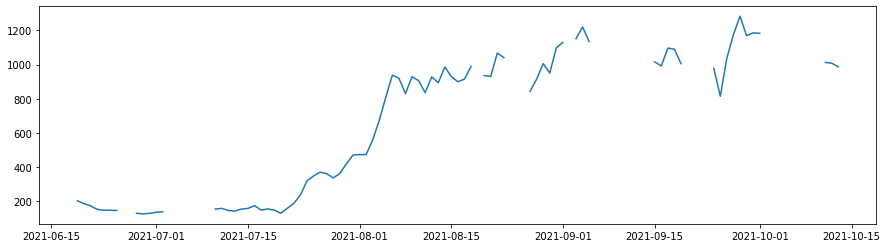

In [104]:
plt.figure(figsize=(15,4))

plt.plot(df[['Nitrate(g/ml)']].resample('D').mean())
plt.show()

# **(IoT) Air Quality Data Set**

Original Source: http://archive.ics.uci.edu/ml/datasets/air+quality

Date: 04/09/2022

Description

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses.






In [105]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip

--2022-09-09 14:29:50--  http://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1543989 (1.5M) [application/x-httpd-php]
Saving to: ‘AirQualityUCI.zip’

AirQualityUCI.zip   100%[===================>]   1.47M  1.58MB/s    in 0.9s    

2022-09-09 14:29:51 (1.58 MB/s) - ‘AirQualityUCI.zip’ saved [1543989/1543989]



In [106]:
!ls /content


 AirQualityUCI.zip
'Annual CSV REVISED 2019-20 published Jun 2020.csv'
 Annual-CSV-REVISED-2019-20-published-Jun-2020-g3XA1.zip
 competitive-data-science-predict-future-sales.zip
 df_additive.csv
 df_multiplicative.csv
 IoTPond10.csv
 IoTPond11.csv
 IoTPond12.csv
 IoTpond1.csv
 IoTPond2.csv
 IoTPond3.csv
 IoTPond4.csv
 IoTPond6.csv
 IoTPond7.csv
 IoTPond8.csv
 IoTPond9.csv
 item_categories.csv
 items.csv
 kaggle.json
 pharma.csv
 pharma-sales-data.zip
 salesdaily.csv
 saleshourly.csv
 salesmonthly.csv
 sales_train.csv
 salesweekly.csv
 sample_data
 sample_submission.csv
 sensor-based-aquaponics-fish-pond-datasets.zip
 shops.csv
 test.csv
 US_Accidents_Dec21_updated.csv
 us-accidents.zip


In [107]:
!unzip AirQualityUCI.zip
!ls /content

Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      
 AirQualityUCI.csv
 AirQualityUCI.xlsx
 AirQualityUCI.zip
'Annual CSV REVISED 2019-20 published Jun 2020.csv'
 Annual-CSV-REVISED-2019-20-published-Jun-2020-g3XA1.zip
 competitive-data-science-predict-future-sales.zip
 df_additive.csv
 df_multiplicative.csv
 IoTPond10.csv
 IoTPond11.csv
 IoTPond12.csv
 IoTpond1.csv
 IoTPond2.csv
 IoTPond3.csv
 IoTPond4.csv
 IoTPond6.csv
 IoTPond7.csv
 IoTPond8.csv
 IoTPond9.csv
 item_categories.csv
 items.csv
 kaggle.json
 pharma.csv
 pharma-sales-data.zip
 salesdaily.csv
 saleshourly.csv
 salesmonthly.csv
 sales_train.csv
 salesweekly.csv
 sample_data
 sample_submission.csv
 sensor-based-aquaponics-fish-pond-datasets.zip
 shops.csv
 test.csv
 US_Accidents_Dec21_updated.csv
 us-accidents.zip


In [108]:
df = pd.read_csv('AirQualityUCI.csv',sep=';')
display( df.head() )
print(df.shape)
display( df.tail() )

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


(9471, 17)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
df = df[ - df.Date.isnull() ]
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568",NaN,NaN
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119",NaN,NaN
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406",NaN,NaN
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139",NaN,NaN


In [110]:
df = df[ df.columns[0:14] ]
display( df.head() )
print(df.shape)
display( df.tail() )


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6"


(9357, 14)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3"
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7"
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3"
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5"
9356,04/04/2005,14.00.00,"2,2",1071.0,-200.0,"11,9",1047.0,265.0,654.0,168.0,1129.0,816.0,"28,5","13,1"


In [111]:
index_dates = pd.date_range(start='03/10/2004 18:00:00', end='04/04/2005 14:00:00', freq='H')

In [112]:
len(df) == len(index_dates)

True

In [113]:
df.index = index_dates

In [114]:
df.dtypes 

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
dtype: object

In [115]:
for c in ['T','CO(GT)','RH','C6H6(GT)']:
  df[c] = df[c].str.replace(',','.').astype('float64')
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
2004-03-10 18:00:00,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9
2004-03-10 19:00:00,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7
2004-03-10 20:00:00,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0
2004-03-10 21:00:00,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0
2004-03-10 22:00:00,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6


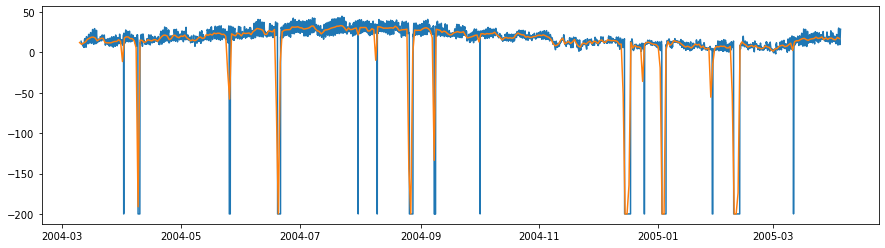

In [116]:
plt.figure(figsize=(15,4))

plt.plot(df[['T']])
plt.plot(df[['T']].resample('D').mean())
plt.show()

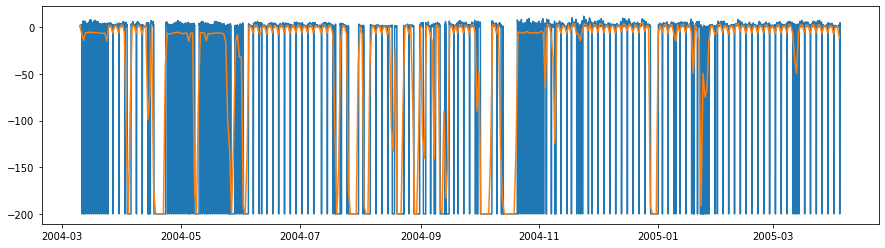

In [117]:
plt.figure(figsize=(15,4))

plt.plot(df[['CO(GT)']])
plt.plot(df[['CO(GT)']].resample('D').mean())
plt.show()

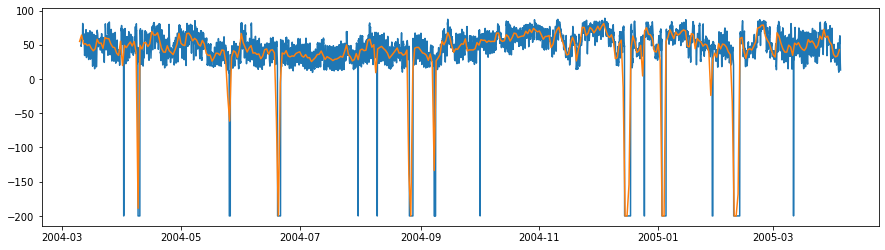

In [118]:
plt.figure(figsize=(15,4))

plt.plot(df[['RH']])
plt.plot(df[['RH']].resample('D').mean())
plt.show()

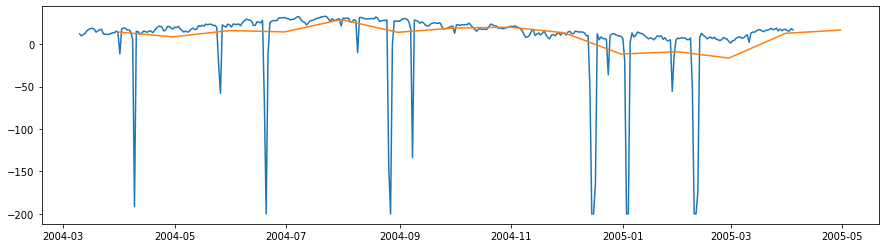

In [119]:
plt.figure(figsize=(15,4))

plt.plot(df[['T']].resample('D').mean())
plt.plot(df[['T']].resample('M').mean())
plt.show()

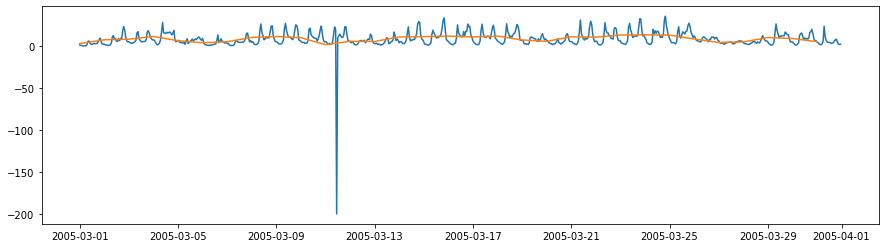

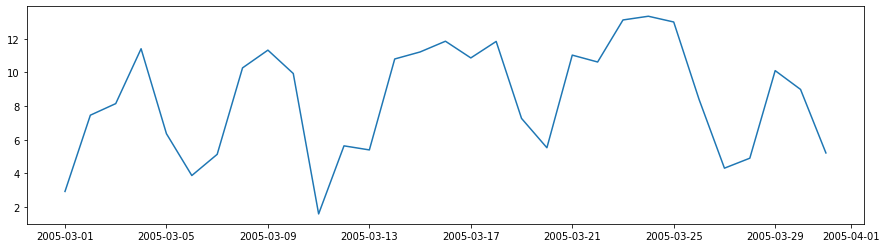

In [120]:
plt.figure(figsize=(15,4))

plt.plot(df[ (df.index.year == 2005) & (df.index.month == 3) ][['C6H6(GT)']])
plt.plot(df[ (df.index.year == 2005) & (df.index.month == 3) ][['C6H6(GT)']].resample('D').mean())
plt.show()

plt.figure(figsize=(15,4))

plt.plot(df[ (df.index.year == 2005) & (df.index.month == 3) ][['C6H6(GT)']].resample('D').mean())
plt.show()

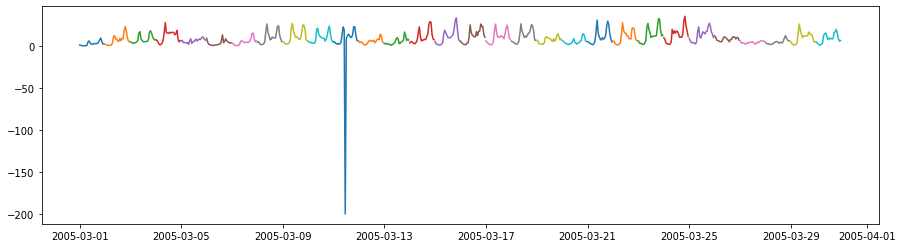

In [121]:
plt.figure(figsize=(15,4))

for day in range(1,31):
  plt.plot(df[ (df.index.year == 2005) & (df.index.month == 3) & (df.index.day == day) ][['C6H6(GT)']])
  
plt.show()

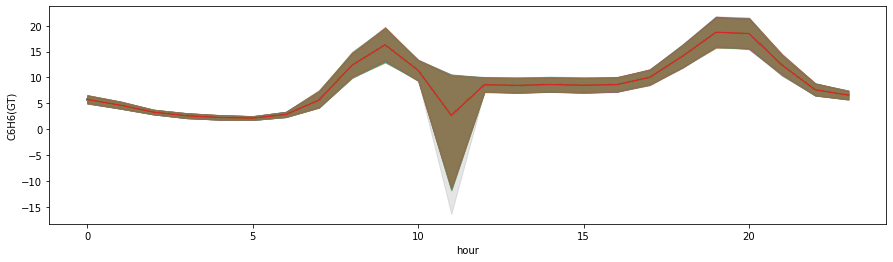

In [122]:
plt.figure(figsize=(15,4))

df2 = df[ (df.index.year == 2005) & (df.index.month == 3) ][['C6H6(GT)']]  
df2['hour'] = df2.index.hour

for hour in range(0,24):
  sns.lineplot(x='hour', y='C6H6(GT)', data=df2)
  
plt.show()

# **Google Trends**

Original Source: Google Trends

Date: 09/09/2022

Description

Pesquisa de termos no buscador Google.




In [123]:
# Este código apenas instala o pacotes para buscar dados do Google Trends e você pode querer empregá-lo para fazer suas próprias pesquisas.
!pip install pytrends
from pytrends.request import TrendReq
pytrend = TrendReq()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [124]:
pytrend.build_payload(kw_list=['Covid','Hotel','NetFlix','Notebook'], cat=0, timeframe='2020-02-25 2022-06-10', geo='BR')
trends = pytrend.interest_over_time()

trends.head()

,Covid,Hotel,NetFlix,Notebook,isPartial
date,,,,,
2020-03-01,1,20,17,7,False
2020-03-08,4,18,15,7,False
2020-03-15,27,10,30,9,False
2020-03-22,34,6,37,11,False
2020-03-29,33,6,35,11,False


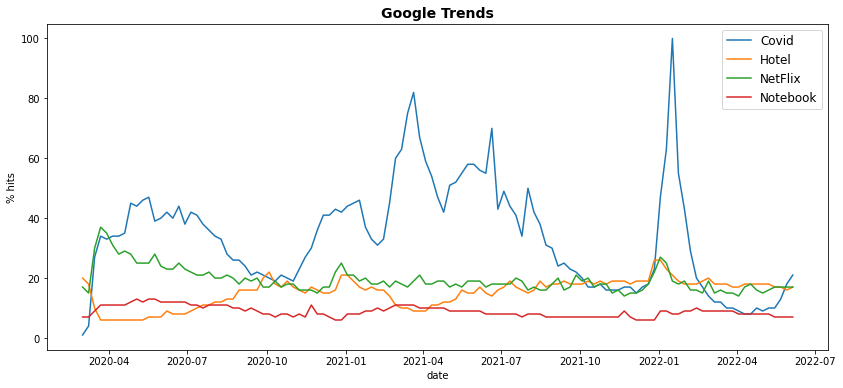

In [125]:
fig, ax = plt.subplots(figsize=(14,6))

# Gráficos
ax.plot(trends.index, trends.Covid, label='Covid')
ax.plot(trends.index, trends.Hotel, label='Hotel')
ax.plot(trends.index, trends.NetFlix, label='NetFlix')
ax.plot(trends.index, trends.Notebook, label='Notebook')

# Anotações
from datetime import datetime

ax.set_title('Google Trends', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("% hits")

ax.legend(fontsize=12)
plt.show()

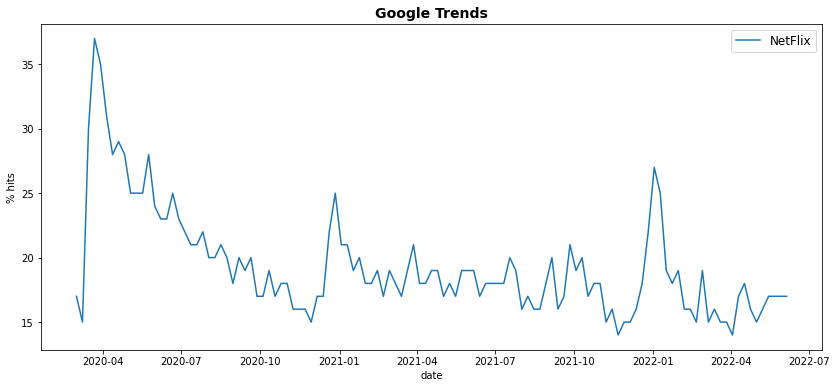

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

# Gráficos
ax.plot(trends.index, trends.NetFlix, label='NetFlix')

# Anotações
from datetime import datetime

ax.set_title('Google Trends', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("% hits")

ax.legend(fontsize=12)
plt.show()

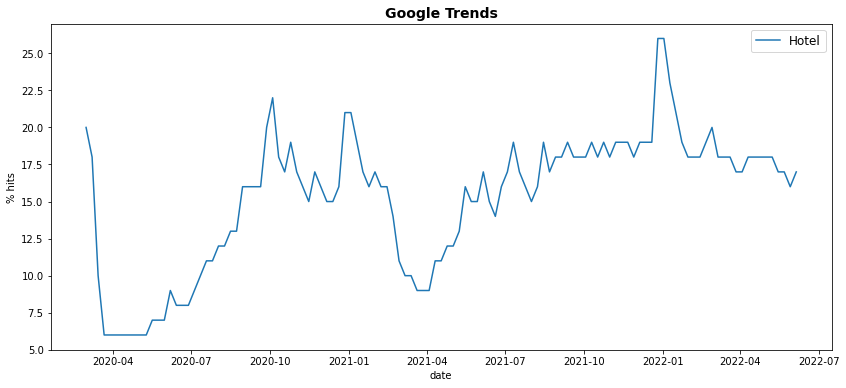

In [127]:
fig, ax = plt.subplots(figsize=(14,6))

# Gráficos
ax.plot(trends.index, trends.Hotel, label='Hotel')

# Anotações
from datetime import datetime

ax.set_title('Google Trends', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("% hits")

ax.legend(fontsize=12)
plt.show()

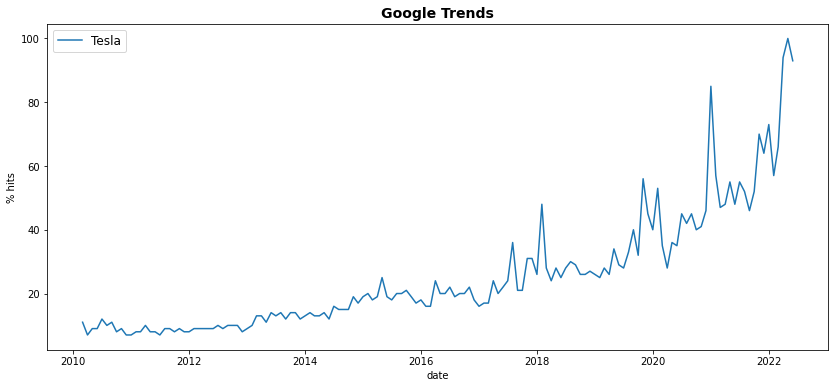

In [146]:
keyword = 'Tesla'

pytrend.build_payload(kw_list=[keyword], cat=0, timeframe='2010-02-25 2022-06-10', geo='BR')
trends = pytrend.interest_over_time()

trends.head()

fig, ax = plt.subplots(figsize=(14,6))

# Gráficos
ax.plot(trends.index, trends[keyword], label=keyword)

# Anotações
from datetime import datetime

ax.set_title('Google Trends', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("% hits")

ax.legend(fontsize=12)
plt.show()

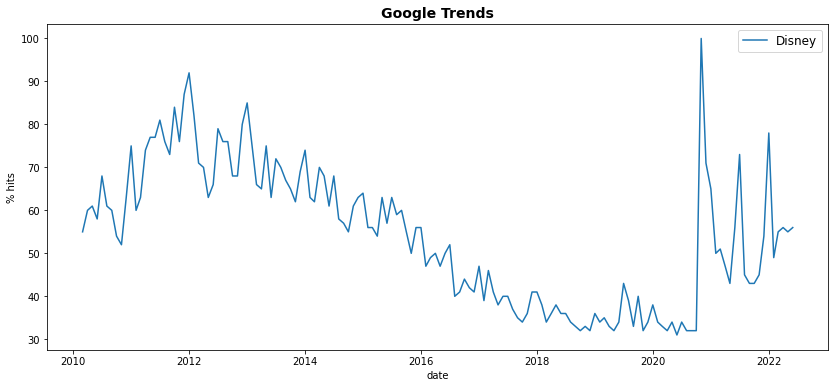

In [147]:
keyword = 'Disney'

pytrend.build_payload(kw_list=[keyword], cat=0, timeframe='2010-02-25 2022-06-10', geo='BR')
trends = pytrend.interest_over_time()

trends.head()

fig, ax = plt.subplots(figsize=(14,6))

# Gráficos
ax.plot(trends.index, trends[keyword], label=keyword)

# Anotações
from datetime import datetime

ax.set_title('Google Trends', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("% hits")

ax.legend(fontsize=12)
plt.show()